# Machine learning
- __Toy datasets__
- __Regression__
- __Classification__
- __Clustering__

In [2]:
from sklearn import datasets
from sklearn import model_selection # was cross_validation
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import seaborn as sns

# Built in datasets

In [6]:
datasets.load_boston

<function sklearn.datasets.base.load_boston(return_X_y=False)>

In [7]:
datasets.fetch_california_housing

<function sklearn.datasets.california_housing.fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)>

In [8]:
datasets.make_regression

<function sklearn.datasets.samples_generator.make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)>

# Regression

In [8]:
np.random.seed(123)

In [9]:
# create regression problem with 50 samples & 50 features
# only 10 features contribute to model's predictive power

X_all, y_all = datasets.make_regression(
    n_samples=50, 
    n_features=50, 
    n_informative=10) #, noise=2.5)

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_all, y_all, train_size=0.5)

In [12]:
X_train.shape, y_train.shape

((25, 50), (25,))

In [13]:
X_test.shape, y_test.shape

((25, 50), (25,))

In [15]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
def sse(resid):
    return sum(resid**2)

In [24]:
# training residuals basically zero (expected) due to overfitting (2X features vs data points)
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

3.822643241858254e-24

In [25]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_train)
sse_test

3.822643241858254e-24

In [26]:
model.score(X_train, y_train)

1.0

In [27]:
# big diff between training score & test score
# indicates probable OVERFIT going on.
model.score(X_test, y_test)

0.6704734083128553

In [28]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

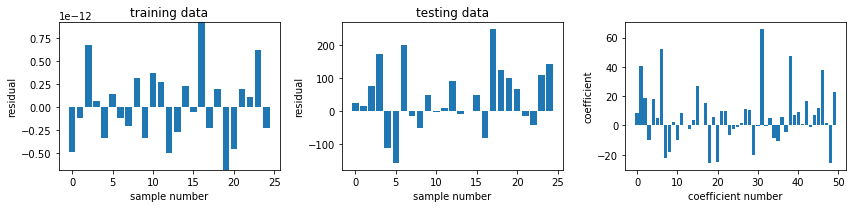

In [29]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
#fig.savefig("ch15-regression-ols.pdf")

### Regularized regression
- Not always practical to gather enough samples to overcome overfit
- Ordinary LE: params chosen to minimize sum of squared residuals
- Regularization = adding a penalty in the objective function
- Two most popular: adding L1 or L2 norms of parameter vector to minimizatio objective function. They are known as __Lasso__ and __Ridge__ regression respectively.

In [30]:
model = linear_model.Ridge(alpha=2.5)

In [31]:
model.fit(X_train, y_train)

Ridge(alpha=2.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
# find model predictions & corresponding SSE values for training & test datasets
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)

resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)

sse_train, sse_test

(3198.687325364639, 253651.40665117663)

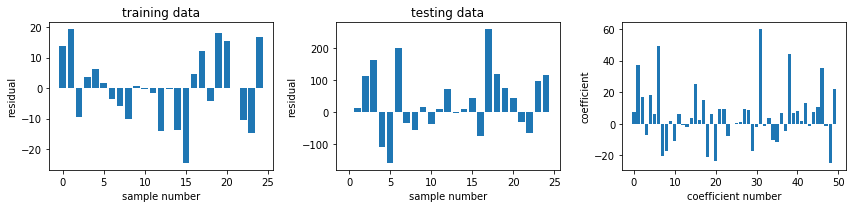

In [33]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
#fig.savefig("ch15-regression-ridge.pdf")

In [34]:
model = linear_model.Lasso(alpha=1.0)

In [35]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)

resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)

sse_train, sse_test

(355.2631197078741, 925.1210329073904)

* Note: training SSE decreased by ~10X; testing SSE decreased by >250X.
* Lasso should be better at predicting the training set.

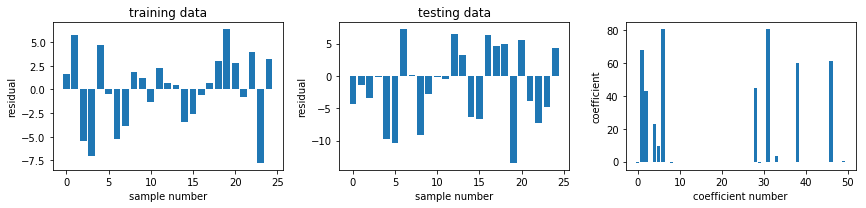

In [39]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
#fig.savefig("ch15-regression-lasso.pdf")

In [40]:
# alpha was chosen arbitrarily; best value is problem-dependent.
# let's analyze fit vs alpha.
alphas = np.logspace(-4, 2, 100)

In [41]:
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107.84767754056492, tolerance: 101.02958727548564
  positive)
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120.79235662528833, tolerance: 101.02958727548564
  positive)
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137.44280341239332, tolerance: 101.02958727548564
  positive)
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

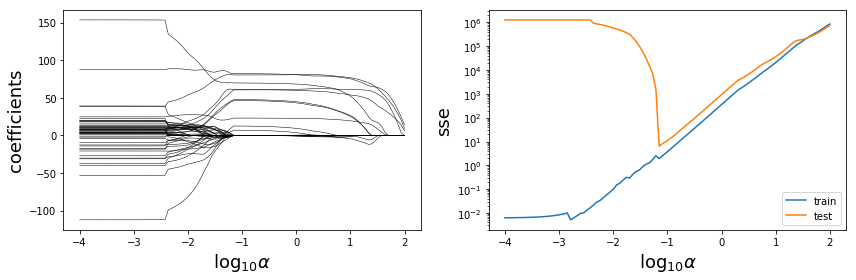

In [42]:
# plot coefficients (left) and SSE (right) for training & test datasets
# for LASSO regression
# vs logarithm of alpha regularization parameter.

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
fig.tight_layout()
#fig.savefig("ch15-regression-lasso-vs-alpha.pdf")

### Cross-validated regression
* Use RidgeCV and LassoCV to automatically find optimal values of alpha.
* CV = "cross validation"
* Default CV setup: k-fold with k=3.

In [43]:
model = linear_model.LassoCV()
model.fit(X_all, y_all)

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [44]:
# alpha selected by CV process.
model.alpha_

0.10636631704955543

In [45]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)

resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)

sse_train, sse_test

(4.724131950403188, 2.879748529204052)

In [46]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9999953240114329, 0.9999963935416253)

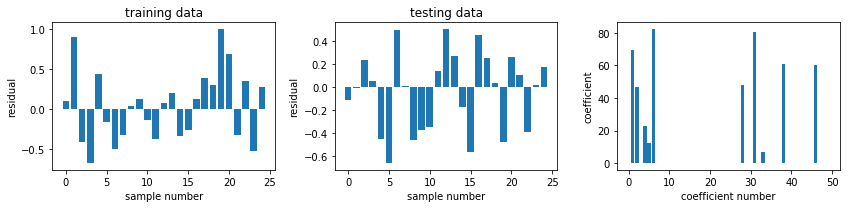

In [47]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
#fig.savefig("ch15-regression-lasso-cv.pdf")

### Elastic-Net regularization
- combines Ridge & Lasso methods

In [48]:
model = linear_model.ElasticNetCV()
model.fit(X_all, y_all)

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [50]:
# alpha & l1 ratio params found by cross-validation
model.alpha_, model.l1_ratio

(0.21273263409911083, 0.5)

In [51]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)

resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)

sse_test, sse_train

(4579.324991451532, 10751.65722465327)

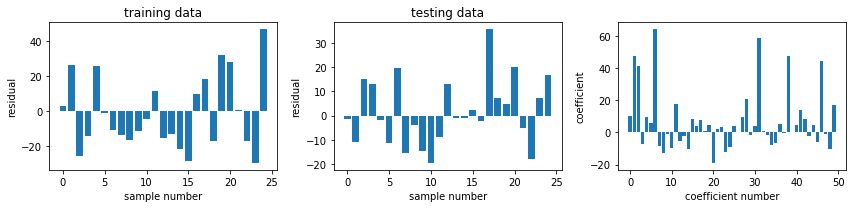

In [52]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
#fig.savefig("ch15-regression-elastic-net-cv.pdf")

# Classification

In [53]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [58]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [59]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [60]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [64]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris.data, 
    iris.target, 
    train_size=0.7)

### Logistic regression classifier

In [68]:
classifier = linear_model.LogisticRegression()
classifier.fit(X_train, y_train)

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# classifier trained; # use it for predicting class for new observations
y_test_pred = classifier.predict(X_test)

In [70]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [63]:
np.bincount(y_test)

array([16, 17, 12])

In [71]:
# confusion matrix:
# diagonals = # of samples correctly classified for each category level
# off diagonals = # of incorrectly classified samples
metrics.confusion_matrix(y_test, y_test_pred)

array([[19,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 12]])

### Basic decision tree classifier

In [72]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[19,  0,  0],
       [ 0, 13,  1],
       [ 0,  1, 11]])

### K-Neighbors classifier

In [73]:
classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[19,  0,  0],
       [ 0, 13,  1],
       [ 0,  1, 11]])

### SVC (Support Vector classifier)

In [74]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[19,  0,  0],
       [ 0, 13,  1],
       [ 0,  1, 11]])

### Random Forest classifier

In [68]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 12]])

### Apply multi classifiers to same problem - compare performance

In [75]:
train_size_vec = np.linspace(0.1, 0.9, 30)

In [76]:
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier
              ]

In [77]:
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

In [79]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators

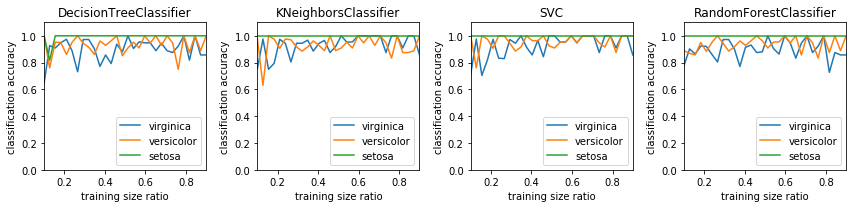

In [80]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

fig.tight_layout()
#fig.savefig("ch15-classification-comparison.pdf")

### Clustering

- Type of classification problem where the classes are unknown
- Returns array of integers that assigns each sample to a cluster (class)

In [81]:
X, y = iris.data, iris.target

In [82]:
np.random.seed(123)
n_clusters = 3

In [83]:
c = cluster.KMeans(n_clusters=n_clusters)
c.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
y_pred = c.predict(X)
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [85]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [86]:
# to compare two arrays, need to rename elements so
# the same integer values are used for the same group

idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))

In [87]:
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1

In [88]:
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [90]:
# now we can summarize overlaps btwn supervised & unsupervised Iris classification
# using a confusion matrix.
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

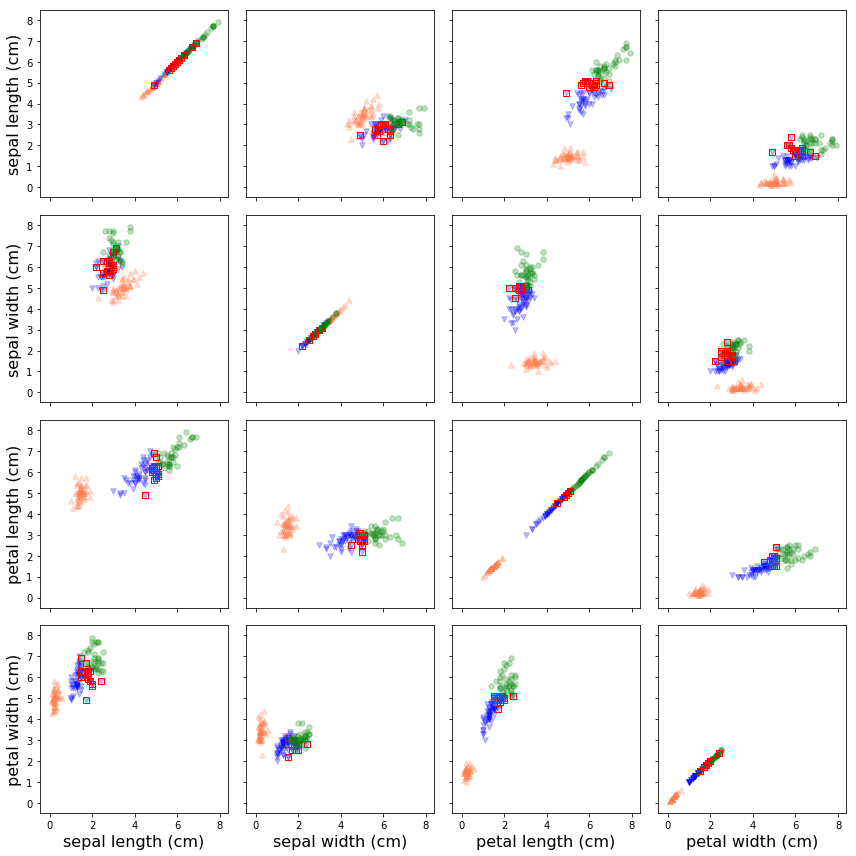

In [91]:
N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
            
            
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()
#fig.savefig("ch15-clustering.pdf")

* Above:
- Scatter plots for each pair of features
- Red squares (hard to see) drawn around each sample where clustering doesn't agree with supervised classification.